In [1]:
library(dplyr)
library(ggplot2)
install.packages("jsonlite")
library(jsonlite)
library(glue)

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ERROR: Error in value[[3L]](cond): Package ‘jsonlite’ version 1.8.9 cannot be unloaded:
 Error in unloadNamespace(package) : namespace ‘jsonlite’ is imported by ‘IRkernel’, ‘repr’ so cannot be unloaded



In [2]:
output_dir <- glue("/lustre/groups/ml01/workspace/ot_perturbation/figures/zebrafish/benchmark/single_condition/large_heatmaps")

ERROR: Error in glue("/lustre/groups/ml01/workspace/ot_perturbation/figures/zebrafish/benchmark/single_condition/large_heatmaps"): could not find function "glue"


In [3]:
cts_ordered <- read.csv("/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/cell_types_ordered.csv")
gts_ordered <- read.csv("/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/gene_targets_ordered2.csv")
df_merged <- read.csv("/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/results/allocation/same_tp_cf_diff_e_distance.csv")

In [4]:
df_merged$condition <- factor(df_merged$condition, levels = rev(gts_ordered$condition))
df_merged$cell_type <- factor(df_merged$cell_type, levels = cts_ordered$CTs)

In [5]:
options(repr.plot.width = 20, repr.plot.height = 16)

color_dict = c(
    "True"= "#B12F8C",
    "False"= "#566573")
# Ensure the color scale is centered at 0

# Create ggplot
p <- ggplot(df_merged, aes(
  x = cell_type,
  y = condition,
  size = log_perturbation_effect,
  color = larger_zero
)) +
  geom_point(alpha = 0.8) +
  scale_color_manual(
    values = color_dict,
  ) +
  scale_size(range = c(1, 10), name = "Perturbation Effect") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 90, hjust = 1, size = 8),
    axis.text.y = element_text(size = 8),
    legend.position = "right"
  ) +
  labs(
    title = "Improvement of CellFlow over additive model",
    x = "Cell Type",
    y = "Condition"
  )

In [7]:
ggsave(file.path(output_dir, "e_distance_improvement_large.pdf"), plot = p, device = "pdf", width = 20.0, height = 16.0)

ERROR: Error in file.path(output_dir, "e_distance_improvement_large.pdf"): object 'output_dir' not found


Warning message:
“Removed 2556 rows containing missing values or values outside the scale range
(`geom_point()`).”


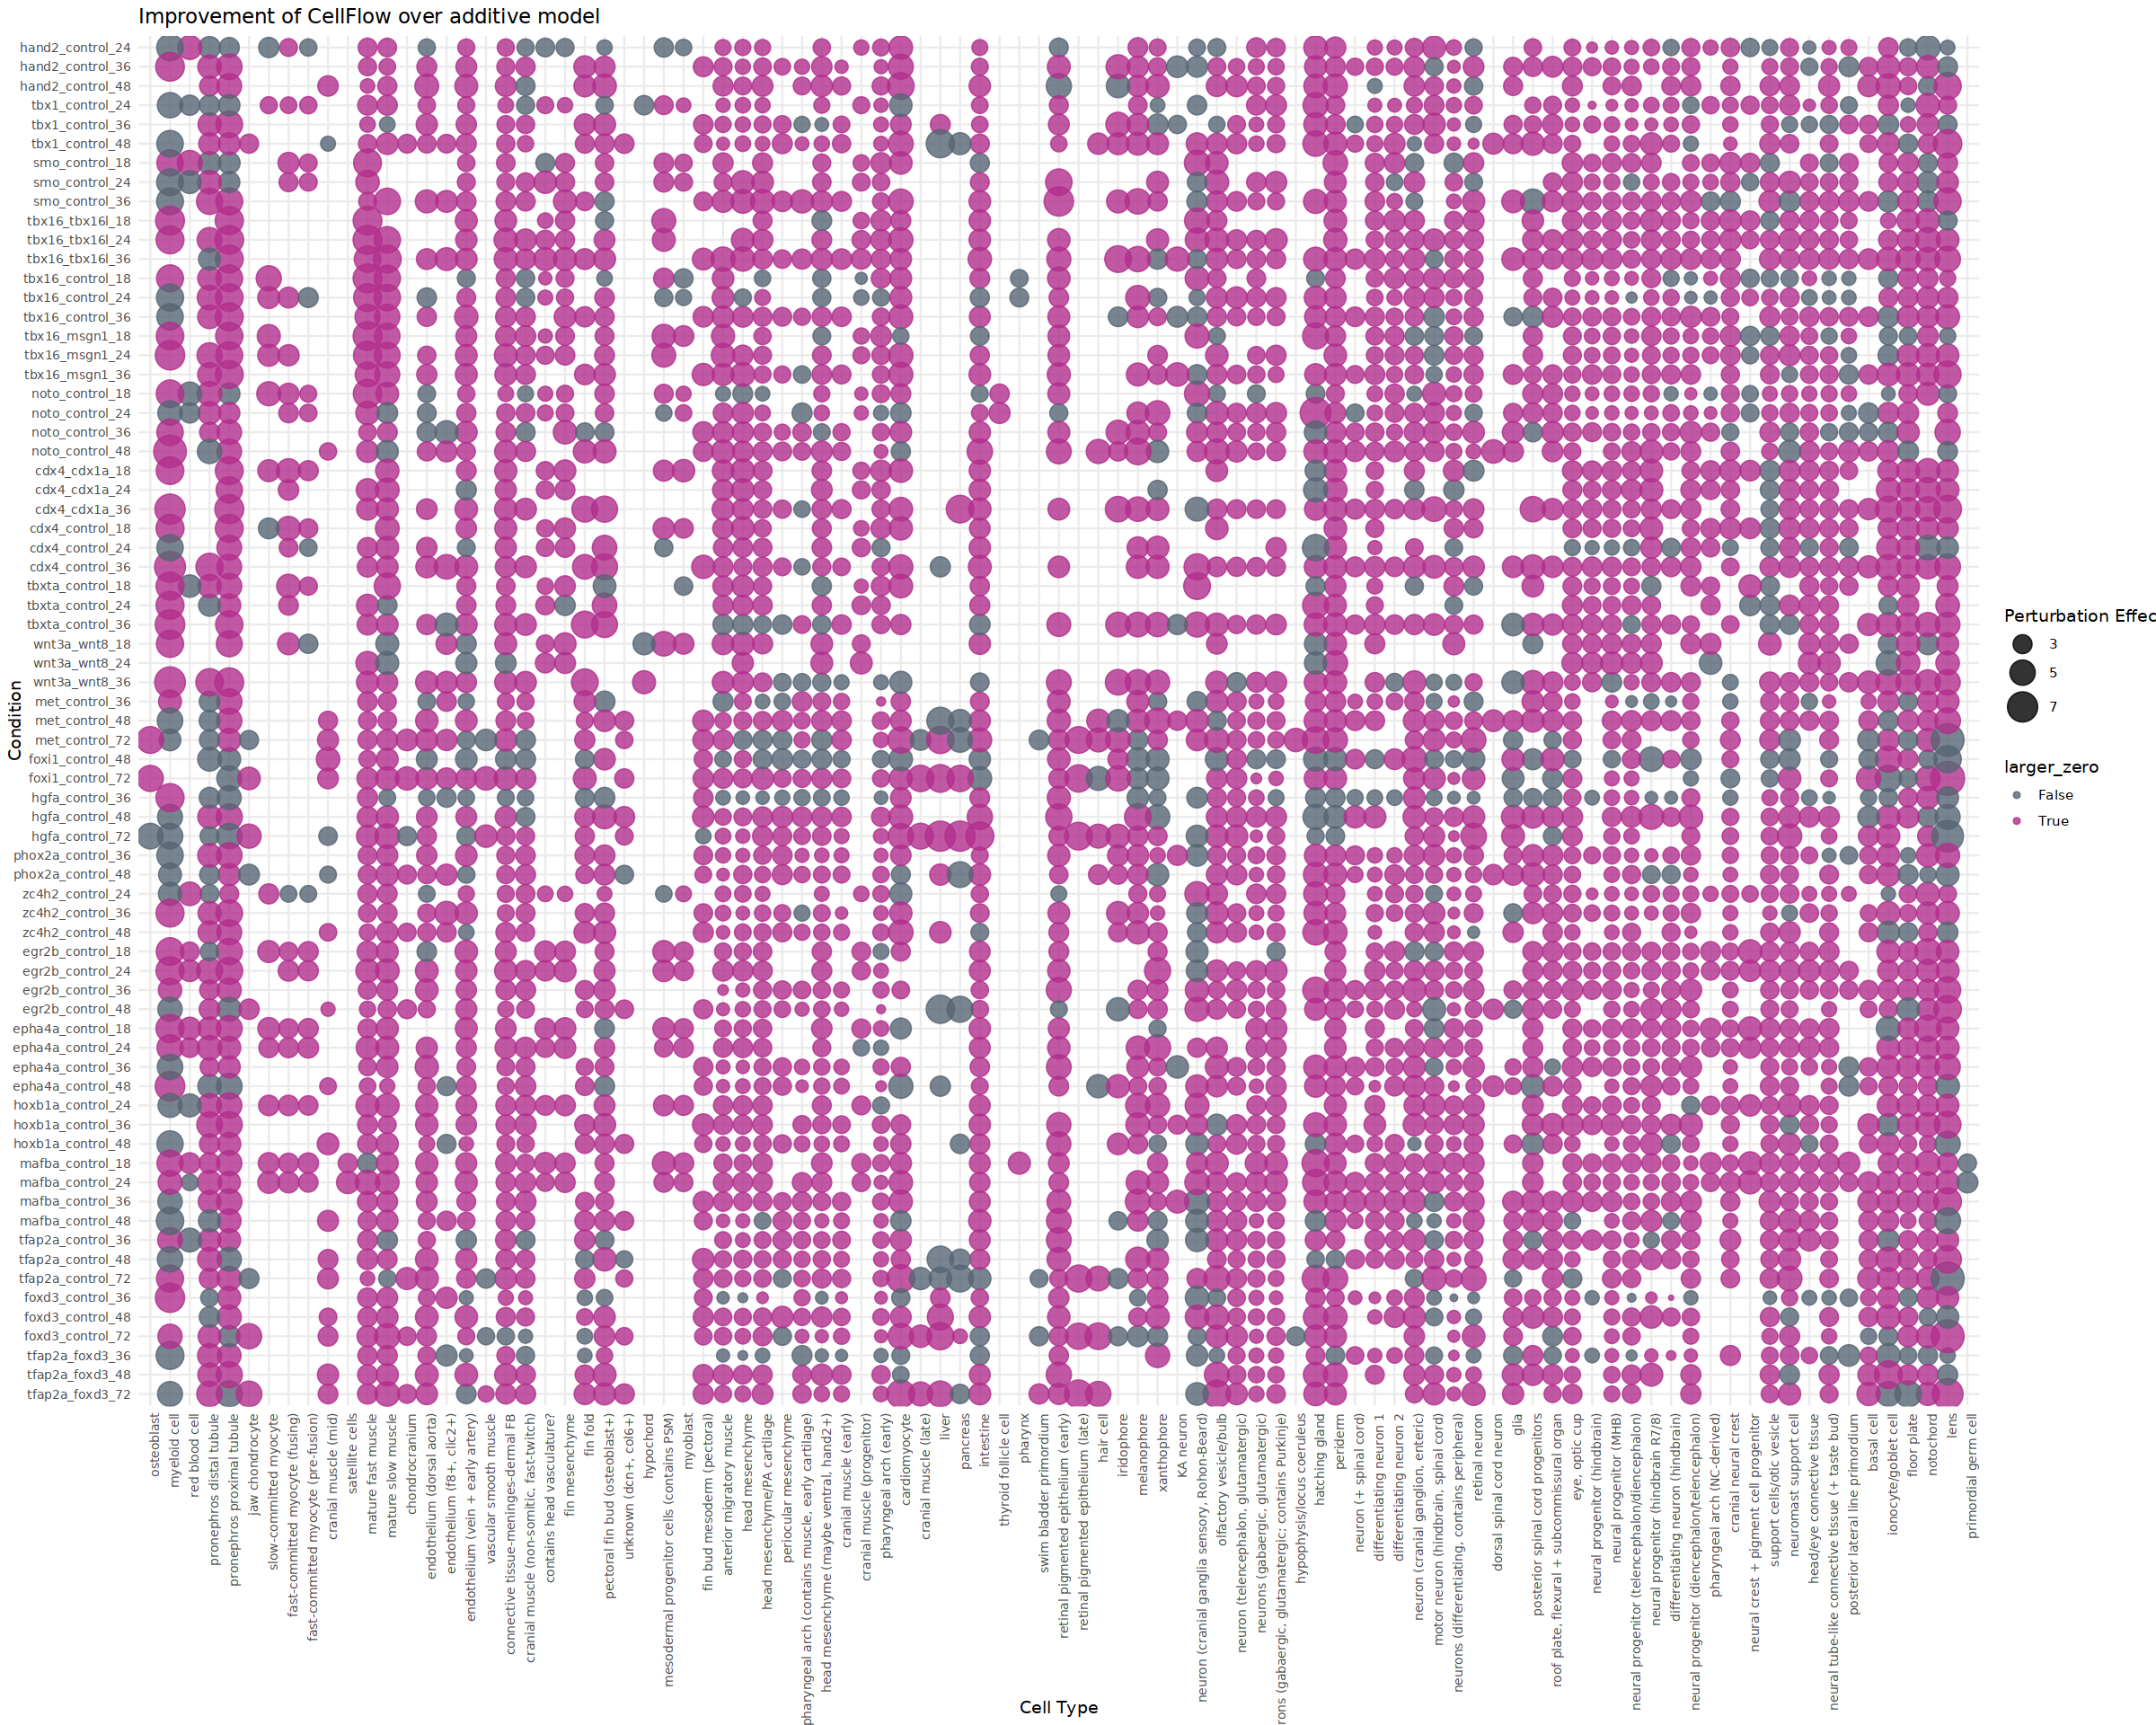

In [6]:
p